# U2AF2
U2AF65 is an essential pre-mRNA splicing factor that guides the early stages of splice-site choice by recognizing polypyrimidine tract consensus sequences near the 3-prime splice site.
[developmental delay, dysmorphic facies, and brain anomalies (DEVDFB](https://omim.org/entry/620535) is caused by heterozygous mutation in the U2AF2 gene.
U2 is a small nuclear ribonucleoproteins (snRNPs). U2 auxiliary factor (U2AF) is a heterodimer that includes U2AF65 and U2AF35 and contributes to binding U2 snRNP to the pre-mRNA branch site. The U2AF2 gene encodes the large subunit U2AF65, it is an indispensable splicing factor in the early step of spliceosome assembly

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.6.dev0


## U2AF2
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for U2AF2.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'U2AF2'
mane_tx_id = 'NM_007279.3'
mane_protein_id = "NP_009210.1" # splicing factor U2AF 65 kDa subunit isoform a
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.24' 
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
   phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 48/48 [00:08<00:00,  6.00 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
46,Global developmental delay
41,Delayed gross motor development
41,Delayed speech and language development
26,Hypotonia
26,Short palpebral fissure
25,Downslanted palpebral fissures
24,Prominent forehead
23,Feeding difficulties
22,Seizure
21,Wide nasal bridge


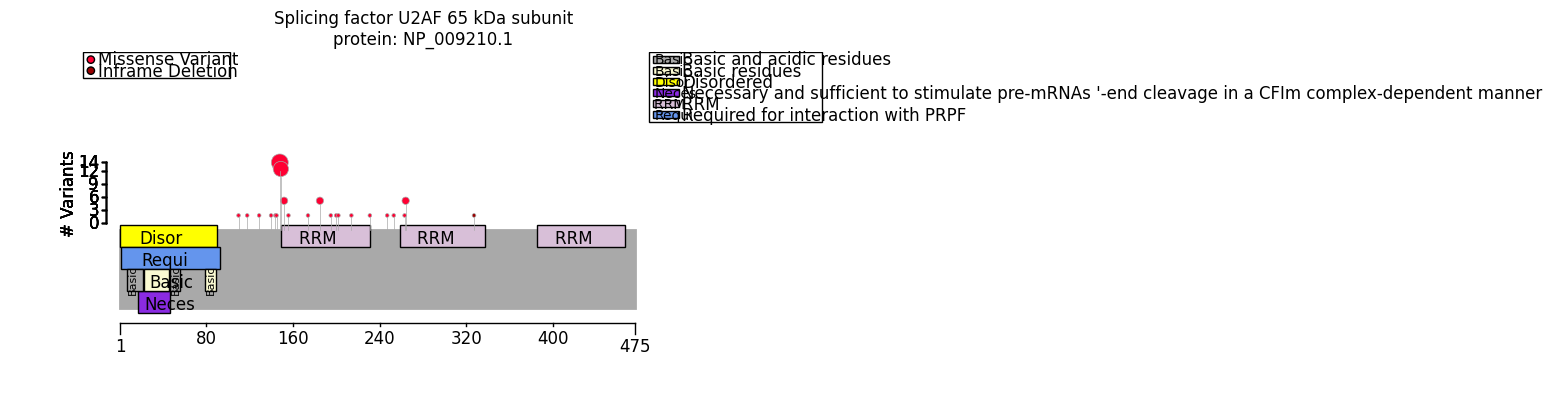

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

u2af2_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
u2af2_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
0,Disordered,Region,2 - 90,
0,Required for interaction with PRPF19,Region,3 - 93,
0,Basic and acidic residues,Compositional bias,8 - 22,
0,Necessary and sufficient to stimulate pre-mRNAs 3'-end cleavage in a CFIm complex-dependent manner,Region,18 - 47,
0,Basic residues,Compositional bias,24 - 46,
0,Basic and acidic residues,Compositional bias,48 - 56,
0,Basic residues,Compositional bias,80 - 89,
21,RRM 1,Domain,150 - 231,p.Arg150His; p.Arg203Cys; p.Val186Met; p.Arg150Cys; p.Asn196Thr; p.Asp215Gly; p.Pro157Leu; p.Val153Met; p.Glu201Asp; p.Leu175Pro
4,RRM 2,Domain,260 - 337,p.Lys329del; p.Gly264Glu; p.Gly265Asp
0,RRM 3,Domain,386 - 466,


In [7]:
from gpsea.view import CohortVariantViewer
cvv = CohortVariantViewer(tx_id=mane_tx_id)
cvv.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
12,19_55661148_55661148_C_T,c.445C>T (p.Arg149Trp),5,missense
7,19_55661151_55661151_C_T,c.448C>T (p.Arg150Cys),5,missense
4,19_55661152_55661152_G_A,c.449G>A (p.Arg150His),5,missense
2,19_55668558_55668558_G_A,c.794G>A (p.Gly265Asp),8,missense
2,19_55661149_55661149_G_A,c.446G>A (p.Arg149Gln),5,missense
2,19_55662571_55662571_G_A,c.556G>A (p.Val186Met),6,missense
2,19_55661160_55661160_G_A,c.457G>A (p.Val153Met),5,missense
1,19_55669118_55669121_TAAG_T,c.985_987del (p.Lys329del),10,inframe deletion
1,19_55663744_55663744_G_A,c.742G>A (p.Gly248Arg),7,"missense, splice region"
1,19_55661092_55661092_T_C,c.389T>C (p.Leu130Pro),5,missense


# Genotype Phenotype Correlation (GPC) Analysis

Residues 149-150 are one of the relative hotspots of pathogenic variation in U2AF2.

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.analysis.predicate import variant_key, anyof
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.view import MtcStatsViewer

r149w = variant_key(key="19_55661148_55661148_C_T") # c.445C>T	p.Arg149Trp	
r150c = variant_key(key="19_55661151_55661151_C_T") # c.448C>T	p.Arg150Cys	
r150h = variant_key(key="19_55661152_55661152_G_A") # c.449G>A	p.Arg150His
var_149_150 = anyof((r149w, r150c, r150h))

var_149_150_predicate = monoallelic_classifier(a_predicate=r149w, 
                                   b_predicate=~r149w, 
                                   a_label="R149,R150 variants",
                                   b_label="other",
                                   )

var_149_150_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=var_149_150_predicate,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(var_149_150_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,8
"Skipping ""general"" level terms",78
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),236


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=var_149_150_result)

Allele group,"R149,R150 variants",other,Corrected p values,p values
Deeply set eye [HP:0000490],10/10 (100%),10/29 (34%),0.077158,0.000436
Preauricular pit [HP:0004467],4/10 (40%),1/33 (3%),0.557291,0.007461
Ptosis [HP:0000508],8/12 (67%),7/34 (21%),0.557291,0.009446
Hypertelorism [HP:0000316],6/11 (55%),4/29 (14%),0.591194,0.014448
Astigmatism [HP:0000483],3/11 (27%),0/29 (0%),0.591194,0.016700
...,...,...,...,...
Intellectual disability [HP:0001249],9/9 (100%),20/20 (100%),1.000000,1.000000
Abnormal forehead morphology [HP:0000290],9/9 (100%),25/25 (100%),1.000000,1.000000
Abnormality of the palpebral fissures [HP:0008050],9/9 (100%),26/26 (100%),1.000000,1.000000
Abnormal eyelid morphology [HP:0000492],9/9 (100%),28/28 (100%),1.000000,1.000000


In [11]:
r149w_clf = monoallelic_classifier(
    a_predicate=r149w,
    b_predicate=~r149w,
    a_label="r149W",
    b_label="other"
)
r149w_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r149w_clf,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=r149w_result)

Allele group,r149W,other,Corrected p values,p values
Deeply set eye [HP:0000490],10/10 (100%),10/29 (34%),0.077158,0.000436
Preauricular pit [HP:0004467],4/10 (40%),1/33 (3%),0.557291,0.007461
Ptosis [HP:0000508],8/12 (67%),7/34 (21%),0.557291,0.009446
Hypertelorism [HP:0000316],6/11 (55%),4/29 (14%),0.591194,0.014448
Astigmatism [HP:0000483],3/11 (27%),0/29 (0%),0.591194,0.016700
...,...,...,...,...
Intellectual disability [HP:0001249],9/9 (100%),20/20 (100%),1.000000,1.000000
Abnormal forehead morphology [HP:0000290],9/9 (100%),25/25 (100%),1.000000,1.000000
Abnormality of the palpebral fissures [HP:0008050],9/9 (100%),26/26 (100%),1.000000,1.000000
Abnormal eyelid morphology [HP:0000492],9/9 (100%),28/28 (100%),1.000000,1.000000


In [12]:
from gpsea.analysis.predicate import protein_feature

# RRM 1	DOMAIN	
rrm1 = protein_feature(feature_id="RRM 1", protein_metadata=protein_meta)
rrm1_predicate = monoallelic_classifier(
    a_predicate=rrm1,
    b_predicate=~rrm1,
    a_label="RRM 1",
    b_label="other"
)
rrm1_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=rrm1_predicate,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=rrm1_result)

Allele group,RRM 1,other,Corrected p values,p values
Deeply set eye [HP:0000490],5/17 (29%),15/22 (68%),1.0,0.024842
Wide intermamillary distance [HP:0006610],1/16 (6%),7/20 (35%),1.0,0.053138
Preauricular pit [HP:0004467],0/19 (0%),5/24 (21%),1.0,0.056235
Hypertelorism [HP:0000316],2/19 (11%),8/21 (38%),1.0,0.069177
Ptosis [HP:0000508],4/21 (19%),11/25 (44%),1.0,0.114755
...,...,...,...,...
Feeding difficulties [HP:0011968],9/17 (53%),14/25 (56%),1.0,1.000000
Thin vermilion border [HP:0000233],9/9 (100%),12/12 (100%),1.0,1.000000
Abdominal symptom [HP:0011458],9/9 (100%),14/14 (100%),1.0,1.000000
Abnormal appendicular skeleton morphology [HP:0011844],9/9 (100%),15/15 (100%),1.0,1.000000


In [13]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Feeding difficulties [HP:0011968],9/24 (38%),14/18 (78%),1.0,0.013315
Clinodactyly [HP:0030084],2/23 (9%),7/18 (39%),1.0,0.028326
Broad forehead [HP:0000337],2/25 (8%),6/18 (33%),1.0,0.051653
Highly arched eyebrow [HP:0002553],2/25 (8%),6/18 (33%),1.0,0.051653
Increased nuchal translucency [HP:0010880],0/26 (0%),3/18 (17%),1.0,0.061613
...,...,...,...,...
Pes planus [HP:0001763],6/27 (22%),5/20 (25%),1.0,1.000000
Anteverted nares [HP:0000463],7/25 (28%),5/19 (26%),1.0,1.000000
Ptosis [HP:0000508],9/27 (33%),6/19 (32%),1.0,1.000000
Abnormal pinna morphology [HP:0000377],9/9 (100%),12/12 (100%),1.0,1.000000


# Summary

In [14]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

ft_results = (
    GPAnalysisResultSummary.from_multi(
        result=r149w_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=var_149_150_result
    ),
     GPAnalysisResultSummary.from_mono(
        result=rrm1_result
    )
    ,
     GPAnalysisResultSummary.from_mono(
        result=mf_result
    )
)

caption = "No statistical analysis of GPCs in U2AF2 identified in published literature."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=ft_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [15]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
r149W,other,177,0
Genotype (A),Genotype (B),Tests performed,Significant tests
"R149,R150 variants",other,177,0
Genotype (A),Genotype (B),Tests performed,Significant tests
RRM 1,other,177,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,177,0


In [16]:
summarizer.process_latex(report=report, protein_fig=u2af2_fig)

Figure saved to ../../supplement/img/U2AF2_protein_diagram-draft.pdf
Output to ../../supplement/tex/U2AF2_summary_draft.tex
